# Olympics Data Analysis( 1896 -2020 )

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import re

C:\Users\hp\anaconda2\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Olympic Host Data Analysis

In [2]:
# read the file
host_df=pd.read_csv(r"C:\Users\hp\Downloads\archive (6)\olympic_hosts.csv")

In [3]:
host_df.shape

(53, 7)

In [4]:
host_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        53 non-null     object
 1   game_end_date    53 non-null     object
 2   game_start_date  53 non-null     object
 3   game_location    53 non-null     object
 4   game_name        53 non-null     object
 5   game_season      53 non-null     object
 6   game_year        53 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB


In [5]:
host_df.head()

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


# Host Country Information 

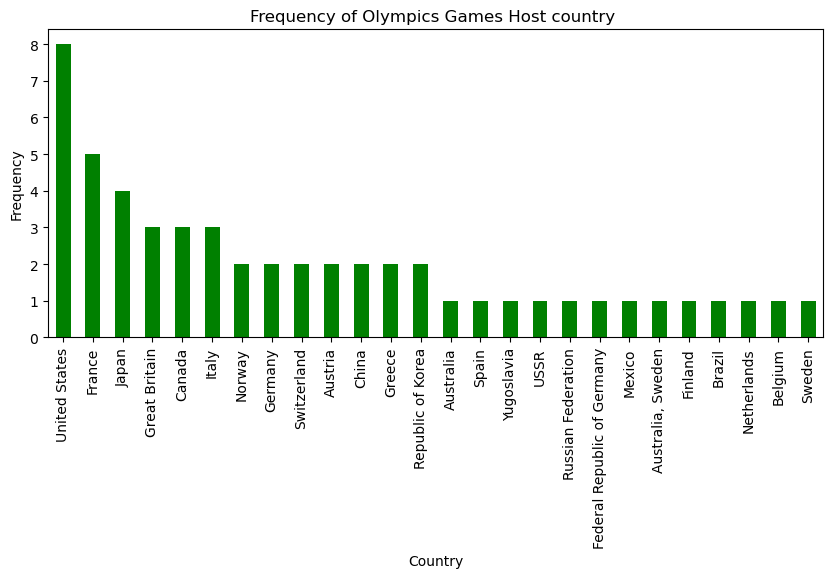

In [6]:
plt.figure(figsize=(10,4))
host_df['game_location'].value_counts().plot(kind='bar',color='green')
plt.xlabel("Country")
plt.ylabel('Frequency')
plt.title("Frequency of Olympics Games Host country ")
plt.show()

# Olympics by Season

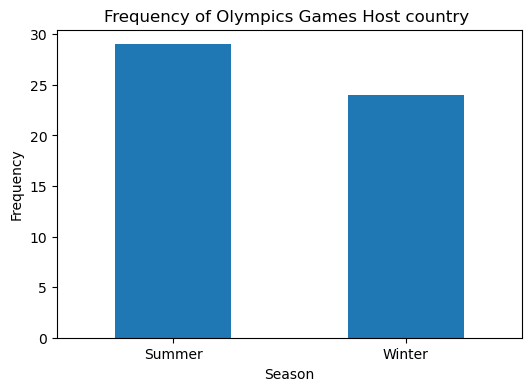

In [7]:
plt.figure(figsize=(6,4))
host_df['game_season'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.title("Frequency of Olympics Games Host country ")
plt.show()

# First Olympics Details

In [8]:
host_df[host_df['game_year']==host_df['game_year'].min()]

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
52,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896


# Olympics game duration

In [9]:
# change the datatype of the column
host_df['game_end_date']=pd.to_datetime(host_df['game_end_date'])
host_df['game_start_date']=pd.to_datetime(host_df['game_start_date'])
host_df['game_end_date'].dtype

datetime64[ns, UTC]

In [10]:
host_df['game_duration']=host_df['game_end_date']-host_df['game_start_date']

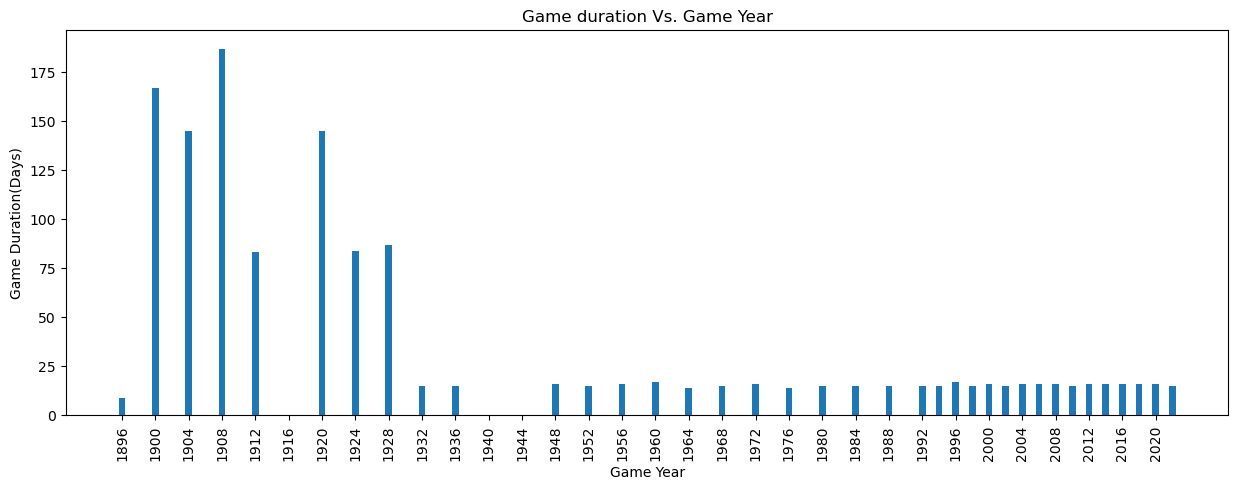

In [11]:
plt.figure(figsize=(15,5))
plt.bar(host_df['game_year'],host_df['game_duration'].dt.days)
plt.xticks(rotation='vertical')
plt.xticks(range(1896,2023,4))
plt.title('Game duration Vs. Game Year')
plt.xlabel('Game Year')
plt.ylabel('Game Duration(Days)')
plt.show()

In [12]:
print('Shortest Olympics Duration: ',host_df['game_duration'].min().days,' days')

Shortest Olympics Duration:  8  days


In [13]:
print('Longest Olympics Duration: ',host_df['game_duration'].max().days,' days')

Longest Olympics Duration:  187  days


# Olympics Athelete Data Analysis

In [14]:
ath_df=pd.read_csv(r"C:\Users\hp\Downloads\archive (6)\olympic_athletes.csv")

In [15]:
ath_df.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


In [16]:
ath_df.sample()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
66119,https://olympics.com/en/athletes/clarence-ches...,Clarence Chester CHILDS,1,Stockholm 1912,1884.0,\n\n\n1\n\nB\n\n,\n\n\nTrack was but one of three sports at whi...


In [17]:
ath_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75904 entries, 0 to 75903
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           75904 non-null  object 
 1   athlete_full_name     75904 non-null  object 
 2   games_participations  75904 non-null  int64  
 3   first_game            75882 non-null  object 
 4   athlete_year_birth    73448 non-null  float64
 5   athlete_medals        15352 non-null  object 
 6   bio                   22842 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.1+ MB


# Top 5 Participants in Games

In [18]:
ath_df.sort_values(by='games_participations',ascending=False).head()[['athlete_full_name','games_participations']]

,athlete_full_name,games_participations
13932,Ian MILLAR,10
2167,Nino SALUKVADZE,9
14975,Afanasijs KUZMINS,9
52073,Hubert RAUDASCHL,9
1755,Claudia PECHSTEIN,8


In [23]:
# Extract year and country
ath_df['first_game_year']=ath_df['first_game'].str.extract(r'(\d{4})')
ath_df['first_game_country']=ath_df['first_game'].str.extract(r'([A-za-z\s]+)')
ath_df['first_game_country']=ath_df['first_game_country'].str.strip()

ath_df['athlete_medals']=ath_df['athlete_medals'].str.replace(r'[n\t\r]','',regex=True).str.strip()

KeyError: 'first_game'

In [20]:
del ath_df['athlete_url']
del ath_df['bio']
del ath_df['first_game']

In [21]:
ath_df.head()

,athlete_full_name,games_participations,athlete_year_birth,athlete_medals,first_game_year,first_game_country
0,Cooper WOODS-TOPALOVIC,1,2000.0,NaN,2022,Beijing
1,Felix ELOFSSON,2,1995.0,NaN,2018,PyeongChang
2,Dylan WALCZYK,1,1993.0,NaN,2022,Beijing
3,Olli PENTTALA,1,1995.0,NaN,2022,Beijing
4,Dmitriy REIKHERD,1,1989.0,NaN,2022,Beijing


In [22]:
ath_df.sample(5)

,athlete_full_name,games_participations,athlete_year_birth,athlete_medals,first_game_year,first_game_country
11349,Vanessa ZAMBOTTI,4,1982.0,NaN,2004,Athens
69145,Kira WALKENHORST,1,1990.0,1\n\nG,2016,Rio
29012,Hiroaki YAMAKAGE,1,NaN,NaN,1998,Nagano
38293,Simione KURUVOLI,2,1951.0,NaN,1984,Los Angeles
36996,Ricardo Joseph TAITANO,1,NaN,NaN,1988,Seoul


In [35]:
ath_df['athlete_medals'].unique()

array([nan, '\n\n\n1\n\nS\n\n', '\n\n\n1\n\nB\n\n',
       '\n\n\n1\n\nG\n\n\n\n2\n\nS\n\n', '\n\n\n1\n\nG\n\n',
       '\n\n\n1\n\nG\n\n\n\n1\n\nB\n\n', '\n\n\n2\n\nG\n\n\n\n1\n\nS\n\n',
       '\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n', '\n\n\n2\n\nS\n\n\n\n1\n\nB\n\n',
       '\n\n\n2\n\nB\n\n', '\n\n\n1\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n',
       '\n\n\n1\n\nG\n\n\n\n1\n\nS\n\n', '\n\n\n1\n\nS\n\n\n\n3\n\nB\n\n',
       '\n\n\n2\n\nG\n\n\n\n4\n\nS\n\n\n\n5\n\nB\n\n',
       '\n\n\n3\n\nG\n\n\n\n2\n\nS\n\n', '\n\n\n2\n\nG\n\n\n\n2\n\nB\n\n',
       '\n\n\n2\n\nG\n\n\n\n2\n\nS\n\n\n\n1\n\nB\n\n',
       '\n\n\n4\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n', '\n\n\n2\n\nG\n\n',
       '\n\n\n1\n\nS\n\n\n\n2\n\nB\n\n', '\n\n\n2\n\nG\n\n\n\n1\n\nB\n\n',
       '\n\n\n3\n\nB\n\n', '\n\n\n2\n\nS\n\n', '\n\n\n3\n\nG\n\n',
       '\n\n\n1\n\nG\n\n\n\n2\n\nS\n\n\n\n1\n\nB\n\n',
       '\n\n\n1\n\nG\n\n\n\n2\n\nB\n\n', '\n\n\n4\n\nG\n\n',
       '\n\n\n3\n\nG\n\n\n\n1\n\nB\n\n', '\n\n\n6\n\nG\n\n\n\n1\n\nB\